# Introduction:

Short-interfering RNAs (siRNAs) are a rapidly-emerging class of therapeutic molecules that combat traditionally ‘undruggable,’ dormant, or rare diseases in a non-palliative manner. The underlying principle of this strategy involves exploiting the perfect base pair complementarity of a siRNA sequence to directly target aberrant messenger RNAs and effectively silence the expression of pathological proteins responsible for diseases. The actual knockdown transpires in an RNA-induced silencing complex (RISC) that contains an argonaut protein that cleaves the paired mRNA strand and halts the upregulation of the associated gene (Friedrich & Aigner, 2022). In this way, overexpressed genes that cause disease in humans can be regulated.

Despite the two decades that have passed since the inception of the RNA interference concept, only four such treatments using siRNA currently exist on the market and are often accompanied by substantial expenses, ranging anywhere from 3,000 to 70,000 dollars (Friedrich & Aigner, 2022). This dearth in and exorbitant cost of technology arises from numerous hurdles impeding successful intracellular siRNA delivery: unmodified siRNAs by themselves are susceptible to anionic repulsion at the cell membrane, endogenous RNase degradation, and clearance via the reticuloendothelial system, which collectively result in poor transfection rates and transgene expression (Dowdy, 2017). Thus, multifunctional delivery vessels are needed to condense, safeguard, and transport high doses of siRNA in a non-cytotoxic, non-immunogenic, and efficient manner. Viral vectors, such as those based on adenoviral or lentiviral capsids have high transfection efficiencies; however, they are costly to produce and pose severe immunogenic risks limiting their translational use. While researchers have recently attempted to construct non-viral vectors from low-cost biomaterials with safer biocompatible profiles than viruses, these systems remain orders of magnitude less efficient compared to their viral counterparts (Sung & Kim, 2019). My project at the Montclare Lab at NYU’s Tandon School of Engineering thus focuses on designing and engineering non-viral proteinaceous delivery vehicles that fulfill these key criteria. By harnessing an empirically-supported, computational approach, new supercharged variants of the Cartilage Oligomeric Matrix Protein’s N-terminal coiled-coil domain (COMPcc) will be designed and screened.

COMPcc is a homopentameric bundle of alpha helices comprised of heptad repeated units. It is natively found in human cartilage, ligaments, and tendons and x-ray crystallographic measurements of its structure reveal the dimensions of its hydrophobic pore can encapsulate and bind small hydrophobic chemicals, such as Vitamins A and D3 (McFarlane et al., 2009). Previous studies by the Montclare Lab have shown this protein subunit’s ability to be used as a drug delivery vehicle, even when adjusted to be positively supercharged on its surface while retaining its hydrophobic core (Liu et al., 2017). This mutated version of COMPcc is referred to as a Coiled-coiled Supercharged Protein (CSP) and has been rationally designed and engineered. Specifically, eight different amino acids along the monomer chain’s solvent-exposed sites have been substituted to arginine residues to generate CSP8, a positively-charged pentamer with a net charge of +53, that can facilitate complexation with negatively-charged plasmid DNA (More et al., 2014). The compactness of this complex allows it to be paired with various lipid shells and create a hybrid gene delivery vehicle, termed lipoproteoplex (LPP) that can shield the complex from denaturing proteases and nucleases and enable efficient cellular entry (Liu et al., 2017; More et al., 2014).

To date, prior research on engineered coiled-coil proteins, like COMPcc, have primarily proceeded empirically via directed evolution or rational design approaches. Only recently have computational tools been developed to aid the screening and design process with significant advancements in de novo coiled-coil design and understanding emerging from David Baker’s group and Derek Woolfson’s group (Koga et al. 2012; Kuhlman et al., 2003). To create new CSP variants of COMPcc in this project, we will use the Rosetta macromolecular-modeling suite. Rosetta is a powerful and widely-used software that is maintained by a worldwide consortium of twenty-two academic labs that make up the Rosetta Commons. As a package, it consists of a series of libraries and applications that use a variety of open-source code to explore the conformational space of biomolecules and evaluate their energy landscapes (Guntas et al., 2010; Leaver-Fay et al., 2011). Of relevance to this project are Rosetta’s abilities to design novel protein folds, model fragment insertion into proteins, and its ability to work with large symmetrical complexes (DiMaio et al., 2011; Koga et al. 2012; Kuhlman et al., 2003; Porter et al., 2015). A key strength of Rosetta that makes it perfect for this project is its user-friendly scripting and versatility. This allows researchers to create custom scripts for their projects and process complex data with ease (Rosetta Commons, n.d.).

For this project, the goal is to develop an algorithmic script that will generate new, optimized CSP variant sequences with a specific net charge. These scripts will begin in Rosetta FastDesign which takes user-defined input parameters of an initial parent sequence (COMPcc) and desired total charge. Afterwards, Rosetta Supercharging will be used to replace existing residues with positively-charged arginine residues along the monomer’s surface. The produced variants will be passed into MakeBundle which will generate a symmetric coiled-coil bundlemer structure and finally undergo a FastRelax protocol to equilibrate and output the final predicted structure. These tools all exist within a Rosetta Supercharging protocol which will be adapted specifically for the purposes of this project.

We hypothesize that by using the Supercharging and FastRelax applications of PyRosetta, the structure of the variant will be similar to the parent structure of COMPcc (Gunasekar et al., 2009). To evaluate this, we will pass the sequences and structures into the Rosetta scoring app which will quantify the thermostability and structural stability of the mutated sequence. Additionally, we will align the output structure to the parent COMPcc sequence in PyMol to quantify the superstructural differences of the coiled-coil based on the percentage of alignment.

Following this, we will assess the ability of the CSPs to bind to a negatively-charged siRNA backbone using the HDock online, server-based, DNA-RNA-Protein docking tool. HDock was developed by the Huang Lab at the Huazhong University of Science and Technology. It uses a hybrid of template-based and ab initio free docking protocols to dock nucleic acid sequences to protein sequences. After completion of the protocol, the server outputs docked images, an HDock score, and respective confidence levels. A lower docking score indicates higher probability of siRNA-protein docking (Yan et al., 2017). The siRNA used for this part of the experiment was isolated from the siRNA-protein PDB entry 1R9F on the Protein Data Bank (Ye et al., 2003). We hypothesize that the well-distributed net positive charge that will be present on the surface of the protein, the siRNA, due to the backbone's negative charge should dock with stability and high confidence.

# Methods:

**Parent Protein Model**

Throughout this project, the native pentameric form of the Cartilage Oligomeric Matrix Protein (COMPcc) will be used as a reference structure, for which high-resolution crystallographic measurements are readily available on the Protein Data Bank (PDB entry 3V2P) (MacFarlane et al., 2012). To obtain the parent protein scaffold, the reference model was imported into PyMol and manually sanitized to remove water and other non-proteinaceous artifact atoms.

**Overview of PyRosetta**

The primary tool in use for this project will be a Python-interfacing version of the protein modeling and design software, Rosetta. This version was selected to prioritize the code’s ability to run in the Jupyter Notebook environment and provide a higher degree of control over Rosetta protocols beyond executing scripts in command line. 

To assess the iterative effect of mutations on the stability of different COMPcc variants, The PyRosetta Commons Suite has many tools that will be used for this project. First, COMPcc will be supercharged with the Rosetta Supercharger Mover, which identifies the position of non-destabilizing, surface-exposed, amino acids via the Rosetta approach. This approach works by targeting surface residues and replacing them with charged residues of the user’s choice. The surface residues are selected by tagging residues that are neighbored by less than 20 atoms in a ten angstrom radius (Rosetta Commons, n.d.). Upon replacement, the mover calculates an updated reference energy and a rotamer-corrected net charge by packing and relaxing the structure and finally uses homology modeling to generate a fully-optimized coiled-coil supercharged protein PDB file. The resultant conformation file is then evaluated by Rosetta’s ScoreFunction application which calculates a weighted sum of physics-based and electronic potentials (e.g. van der Waals energies, dipole electrostatics, hydrogen bonds, disulfide bridges, solvation, protein backbone φ and ψ torsion angles, sidechain rotamers, etc.) for all atoms in the model (Leman et al., 2020). A score of -100 or below is required to ensure basic protein stability (Mulligan, 2017).

Although lysine and aspartic acid residues could have also been employed to imbue charge, arginine’s symmetric guanidium group and the additional flexible methylene group in glutamic acid have been reported to provide more stabilizing inter-/intra-molecular hydrogen bonds compared to their alternatives (Petrauskas et al., 2015). These favorable thermodynamic interactions theoretically aid coordination between positively and negatively supercharged counterparts which are ultimately hypothesized to result in a robust supramolecular assembly (Jacobs et al., 2022).

The following script was used to create four CSPs with target charges of +30, +40, +50, and +60. These values were systematically chosen to demonstrate the flexibility of the script to produce CSPs with a variety of target charges as dictated by the user.

In [2]:
from pyrosetta import *
from pyrosetta.toolbox import *
init()

PyRosetta-4 2023 [Rosetta PyRosetta4.Release.python310.m1 2023.21+release.9b3660a893207250b5c6735d08f5a4dcd45633c5 2023-05-26T08:14:51] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python310.m1 r350 2023.21+release.9b3660a8932 9b3660a893207250b5c6735d08f5a4dcd45633c5 http://www.pyrosetta.org 2023-05-26T08:14:51
core.init: command: PyRosetta -ex1 -ex2aro -database /Users/IronMan/opt/anaconda3/lib/python3.10/site-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=1367609044 seed_offset=0 real_seed=1367609044
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=1367609044 RG_type=mt19937


In [5]:
pose = pose_from_pdb('COMPcc.clean.pdb') #establishes COMPcc as its own pose
chargelist = [30, 40, 50, 60]

for x in chargelist:
    
    supercharge = pyrosetta.rosetta.protocols.design_opt.Supercharge() #creates/refreshes supercharging object

    supercharge.surface_residue_cutoff(20) #residues with <20 neighboring residues within 10 Å are considered part of the surface
    supercharge.include_arg(True) #arginines have been shown to display better charge pairings with anionic surfaces 
    supercharge.refweight_arg(-0.98) #more negative reference energies results in more charge mutations, default is -0.98, thus the higher the magnitude of charge required, the more negative the ref energy will become
    supercharge.dont_mutate_glyprocys(True) #these are important in maintaining protein structure so we don't wish to mutate glycine, prolines, or cysteines
    supercharge.dont_mutate_hbonded_sidechains(True)
    supercharge.dont_mutate_correct_charge(True) #stops mutation of arginine to lysine
    supercharge.target_net_charge_active(True) #allows for the establishment of a net charge that is set by the user
    supercharge.target_net_charge(x) #based on the loop number, the net charge will change based on the element in chargelist

    supercharge.apply(pose)

    supercharge.get_net_charge(pose)

core.import_pose.import_pose: File 'COMPcc.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 42 225
core.conformation.Conformation: Found disulfide between residues 45 87
core.conformation.Conformation: Found disulfide between residues 90 132
core.conformation.Conformation: Found disulfide between residues 180 222
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
protocols.design_opt.Supercharge: Packrotamers
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 4803 rotamers at 225 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 4749 rotamers at 225 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rot

protocols.design_opt.Supercharge: COMPcc.clean.pdb
protocols.design_opt.Supercharge: adding 1 to surface set
protocols.design_opt.Supercharge: adding 2 to surface set
protocols.design_opt.Supercharge: adding 3 to surface set
protocols.design_opt.Supercharge: adding 4 to surface set
protocols.design_opt.Supercharge: adding 5 to surface set
protocols.design_opt.Supercharge: adding 6 to surface set
protocols.design_opt.Supercharge: adding 8 to surface set
protocols.design_opt.Supercharge: adding 9 to surface set
protocols.design_opt.Supercharge: adding 12 to surface set
protocols.design_opt.Supercharge: adding 13 to surface set
protocols.design_opt.Supercharge: adding 15 to surface set
protocols.design_opt.Supercharge: adding 16 to surface set
protocols.design_opt.Supercharge: adding 19 to surface set
protocols.design_opt.Supercharge: adding 20 to surface set
protocols.design_opt.Supercharge: adding 22 to surface set
protocols.design_opt.Supercharge: adding 23 to surface set
protocols.des

protocols.design_opt.Supercharge: adding 161 to surface set
protocols.design_opt.Supercharge: adding 162 to surface set
protocols.design_opt.Supercharge: adding 163 to surface set
protocols.design_opt.Supercharge: adding 164 to surface set
protocols.design_opt.Supercharge: adding 165 to surface set
protocols.design_opt.Supercharge: adding 166 to surface set
protocols.design_opt.Supercharge: adding 168 to surface set
protocols.design_opt.Supercharge: adding 169 to surface set
protocols.design_opt.Supercharge: adding 171 to surface set
protocols.design_opt.Supercharge: adding 172 to surface set
protocols.design_opt.Supercharge: adding 173 to surface set
protocols.design_opt.Supercharge: adding 175 to surface set
protocols.design_opt.Supercharge: adding 176 to surface set
protocols.design_opt.Supercharge: adding 177 to surface set
protocols.design_opt.Supercharge: adding 178 to surface set
protocols.design_opt.Supercharge: adding 179 to surface set
protocols.design_opt.Supercharge: adding

protocols.design_opt.Supercharge: EnergyMethodOptions::show: pb_unbound_tag: unbound
protocols.design_opt.Supercharge: EnergyMethodOptions::show: arg_cation_pi_his_can_be_pi: 1
protocols.design_opt.Supercharge: EnergyMethodOptions::show: ordered_wat_penalty: 1.2210
protocols.design_opt.Supercharge: EnergyMethodOptions::show: ordered_pt_wat_penalty: 2.7090
protocols.design_opt.Supercharge: EnergyMethodOptions::show: nmer_ref_seq_length_: 9
protocols.design_opt.Supercharge: EnergyMethodOptions::show: nmer_svm_term_length_: 3
protocols.design_opt.Supercharge: EnergyMethodOptions::show: nmer_svm_pssm_feat_: 1
protocols.design_opt.Supercharge: EnergyMethodOptions::show: nmer_svm_scorecut_defined_: 0
protocols.design_opt.Supercharge: EnergyMethodOptions::show: nmer_svm_scorecut_: 0.0000
protocols.design_opt.Supercharge: EnergyMethodOptions::show: nmer_svm_avg_rank_as_energy_: 0
protocols.design_opt.Supercharge: EnergyMethodOptions::show: nmer_svm_aa_matrix_defined_: 0
protocols.design_opt.Su

protocols.design_opt.Supercharge: Refweights D E K R -1.2868 -1.5537 -0.2874 -0.7800
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 7256 rotamers at 195 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating PDInteractionGraph
protocols.design_opt.Supercharge: Supercharging the protein surface... current charge: 33  target charge: 30
protocols.design_opt.Supercharge: Refweights D E K R -1.2868 -1.5537 -0.2874 -0.6800
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 7256 rotamers at 195 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating PDInteractionGraph
protocols.design_opt.Supercharge: Supercharging the protein surface... current charge: 32  target charge: 30
protocols.design_opt.Supercharge: Refweights D E K R -1.2868 -1.5537 -0.2874 -0.5800
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 7256 rotamers 

protocols.design_opt.Supercharge: COMPcc.clean.pdb 158 0.7469 0.4895 -0.2097 -1.1669 -0.5518 -0.1698 0.7377 0.8684 0.0000 0.0000 0.0000 0.0000 0.1124 0.0000 0.0928 0.0000 -2.1732 0.2106 0.0000 2.6298
protocols.design_opt.Supercharge: COMPcc.clean.pdb 176 0.2847 -0.2204 0.0158 -0.0778 -0.1210 0.0128 0.9496 -0.5919 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 -0.2008 0.0000 -1.3718 -0.5158 0.0000 2.6298
protocols.design_opt.Supercharge: COMPcc.clean.pdb 178 -0.6454 -0.9554 0.2125 1.9208 -0.2858 0.4911 1.9240 -3.2227 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0889 0.0000 -1.0850 -0.0857 0.0000 2.0510
protocols.design_opt.Supercharge: COMPcc.clean.pdb 182 0.3860 -0.1919 -0.5427 -0.7447 -0.0309 0.3598 1.9704 0.8029 0.0000 0.0000 0.0000 0.1794 -0.7793 0.0000 0.4481 0.0000 -2.5590 1.0300 0.0000 2.0510
protocols.design_opt.Supercharge: COMPcc.clean.pdb 200 0.3593 -0.8083 0.0217 -0.4781 -0.0493 -0.0392 3.2090 0.6821 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 -0.1509 0.0000 -0.9961 -0.4360 0.0000 2

protocols.design_opt.Supercharge: COMPcc.clean.pdb
protocols.design_opt.Supercharge: adding 1 to surface set
protocols.design_opt.Supercharge: adding 2 to surface set
protocols.design_opt.Supercharge: adding 3 to surface set
protocols.design_opt.Supercharge: adding 4 to surface set
protocols.design_opt.Supercharge: adding 5 to surface set
protocols.design_opt.Supercharge: adding 6 to surface set
protocols.design_opt.Supercharge: adding 8 to surface set
protocols.design_opt.Supercharge: adding 9 to surface set
protocols.design_opt.Supercharge: adding 12 to surface set
protocols.design_opt.Supercharge: adding 13 to surface set
protocols.design_opt.Supercharge: adding 15 to surface set
protocols.design_opt.Supercharge: adding 16 to surface set
protocols.design_opt.Supercharge: adding 19 to surface set
protocols.design_opt.Supercharge: adding 20 to surface set
protocols.design_opt.Supercharge: adding 22 to surface set
protocols.design_opt.Supercharge: adding 23 to surface set
protocols.des

protocols.design_opt.Supercharge: adding 115 to surface set
protocols.design_opt.Supercharge: adding 116 to surface set
protocols.design_opt.Supercharge: adding 117 to surface set
protocols.design_opt.Supercharge: adding 119 to surface set
protocols.design_opt.Supercharge: adding 120 to surface set
protocols.design_opt.Supercharge: adding 123 to surface set
protocols.design_opt.Supercharge: adding 124 to surface set
protocols.design_opt.Supercharge: adding 126 to surface set
protocols.design_opt.Supercharge: adding 127 to surface set
protocols.design_opt.Supercharge: adding 128 to surface set
protocols.design_opt.Supercharge: adding 130 to surface set
protocols.design_opt.Supercharge: adding 131 to surface set
protocols.design_opt.Supercharge: adding 133 to surface set
protocols.design_opt.Supercharge: adding 134 to surface set
protocols.design_opt.Supercharge: adding 135 to surface set
protocols.design_opt.Supercharge: adding 136 to surface set
protocols.design_opt.Supercharge: adding

protocols.design_opt.Supercharge: EnergyMethodOptions::show: grpelec_fade_type: false
protocols.design_opt.Supercharge: EnergyMethodOptions::show: grpelec_fade_param1: 1.0000
protocols.design_opt.Supercharge: EnergyMethodOptions::show: grpelec_fade_param2: 1.0000
protocols.design_opt.Supercharge: EnergyMethodOptions::show: grpelec_fade_hbond: 0
protocols.design_opt.Supercharge: EnergyMethodOptions::show: grp_cpfxn: 1
protocols.design_opt.Supercharge: EnergyMethodOptions::show: elec_group_file: /scoring/score_functions/elec_group_def.dat
protocols.design_opt.Supercharge: EnergyMethodOptions::show: grpelec_context_dependent: 0
protocols.design_opt.Supercharge: EnergyMethodOptions::show: use_polarization: true
protocols.design_opt.Supercharge: EnergyMethodOptions::show: use_gen_kirkwood: true
protocols.design_opt.Supercharge: EnergyMethodOptions::show: protein_dielectric: 1.0000
protocols.design_opt.Supercharge: EnergyMethodOptions::show: water_dielectric: 78.3000
protocols.design_opt.Sup

protocols.design_opt.Supercharge: RNA_EnergyMethodOptions::show: suiteness_bonus: Richardson
protocols.design_opt.Supercharge: RNA_EnergyMethodOptions::show: rna_base_pair_xy_filename: scoring/rna/rna_base_pair_xy.dat
protocols.design_opt.Supercharge: FreeDOF_Options::show: free_suite_bonus: -1.0000
protocols.design_opt.Supercharge: FreeDOF_Options::show: free_2HOprime_bonus: -0.5000
protocols.design_opt.Supercharge: FreeDOF_Options::show: free_sugar_bonus: -1.0000
protocols.design_opt.Supercharge: FreeDOF_Options::show: pack_phosphate_penalty: 0.2500
protocols.design_opt.Supercharge: FreeDOF_Options::show: free_side_chain_bonus: -0.5000
protocols.design_opt.Supercharge:
protocols.design_opt.Supercharge: Supercharging the protein surface... current charge: 30  target charge: 40
protocols.design_opt.Supercharge: Refweights D E K R -1.2868 -1.5537 -0.2874 -1.0800
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 6654 rotamers at 196 positions.
cor

protocols.design_opt.Supercharge: COMPcc.clean.pdb
protocols.design_opt.Supercharge: adding 1 to surface set
protocols.design_opt.Supercharge: adding 2 to surface set
protocols.design_opt.Supercharge: adding 3 to surface set
protocols.design_opt.Supercharge: adding 4 to surface set
protocols.design_opt.Supercharge: adding 5 to surface set
protocols.design_opt.Supercharge: adding 6 to surface set
protocols.design_opt.Supercharge: adding 8 to surface set
protocols.design_opt.Supercharge: adding 9 to surface set
protocols.design_opt.Supercharge: adding 12 to surface set
protocols.design_opt.Supercharge: adding 13 to surface set
protocols.design_opt.Supercharge: adding 15 to surface set
protocols.design_opt.Supercharge: adding 16 to surface set
protocols.design_opt.Supercharge: adding 19 to surface set
protocols.design_opt.Supercharge: adding 20 to surface set
protocols.design_opt.Supercharge: adding 22 to surface set
protocols.design_opt.Supercharge: adding 23 to surface set
protocols.des

protocols.design_opt.Supercharge: adding 34 to surface set
protocols.design_opt.Supercharge: adding 37 to surface set
protocols.design_opt.Supercharge: adding 38 to surface set
protocols.design_opt.Supercharge: adding 39 to surface set
protocols.design_opt.Supercharge: adding 40 to surface set
protocols.design_opt.Supercharge: adding 41 to surface set
protocols.design_opt.Supercharge: adding 42 to surface set
protocols.design_opt.Supercharge: adding 43 to surface set
protocols.design_opt.Supercharge: adding 44 to surface set
protocols.design_opt.Supercharge: adding 45 to surface set
protocols.design_opt.Supercharge: adding 46 to surface set
protocols.design_opt.Supercharge: adding 47 to surface set
protocols.design_opt.Supercharge: adding 48 to surface set
protocols.design_opt.Supercharge: adding 49 to surface set
protocols.design_opt.Supercharge: adding 50 to surface set
protocols.design_opt.Supercharge: adding 51 to surface set
protocols.design_opt.Supercharge: adding 52 to surface s

protocols.design_opt.Supercharge: adding 217 to surface set
protocols.design_opt.Supercharge: adding 218 to surface set
protocols.design_opt.Supercharge: adding 219 to surface set
protocols.design_opt.Supercharge: adding 220 to surface set
protocols.design_opt.Supercharge: adding 221 to surface set
protocols.design_opt.Supercharge: adding 222 to surface set
protocols.design_opt.Supercharge: adding 223 to surface set
protocols.design_opt.Supercharge: adding 224 to surface set
protocols.design_opt.Supercharge: adding 225 to surface set
protocols.design_opt.Supercharge: Creating a resfile, it will be saved as ./resfile_output_Rsc
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
protocols.design_opt.Supercharge: Using SCORE12 with custom reference weights
ScoreFunction::show():
weights: (fa_atr 1.0000) (fa_rep 0.5500) (fa_sol 1.0000) (fa_intra_rep 0.0050) (fa_intra_sol_xover4 1.0000) (lk_ball_wtd 1.0000) (fa_elec 1.0000) (p

protocols.design_opt.Supercharge: EnergyMethodOptions::show: hbnet_max_network_size_: 0
protocols.design_opt.Supercharge: EnergyMethodOptions::show: approximate_buried_unsat_penalty_hbond_energy_threshold_: -0.2500
protocols.design_opt.Supercharge: EnergyMethodOptions::show: approximate_buried_unsat_penalty_burial_atomic_depth_: 4.5000
protocols.design_opt.Supercharge: EnergyMethodOptions::show: approximate_buried_unsat_penalty_burial_probe_radius_: 2.3000
protocols.design_opt.Supercharge: EnergyMethodOptions::show: approximate_buried_unsat_penalty_burial_resolution_: 0.5000
protocols.design_opt.Supercharge: EnergyMethodOptions::show: approximate_buried_unsat_penalty_oversat_penalty_: 1.0000
protocols.design_opt.Supercharge: EnergyMethodOptions::show: approximate_buried_unsat_penalty_assume_const_backbone_:1
protocols.design_opt.Supercharge: EnergyMethodOptions::show: approximate_buried_unsat_penalty_natural_corrections1_:0
protocols.design_opt.Supercharge: EnergyMethodOptions::show: a

protocols.design_opt.Supercharge: COMPcc.clean.pdb 192 1.5484 0.5360 -0.0699 -0.5061 0.1628 0.1737 1.3298 0.1313 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 -0.1282 0.0000 -0.3563 0.0558 0.0000 1.3562
protocols.design_opt.Supercharge: COMPcc.clean.pdb 193 2.4579 -0.0588 0.6417 -0.3862 -0.4816 -0.1907 1.0242 0.9737 0.0000 0.0000 0.0000 0.0000 0.7658 0.0000 -0.0265 0.0000 -1.8895 0.3041 0.0000 2.6298
protocols.design_opt.Supercharge: COMPcc.clean.pdb 203 1.6076 -0.0836 -0.0137 -0.3647 -0.0716 -0.0300 0.9227 0.5334 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.1167 0.0000 -1.7818 0.3202 0.0000 2.6298
protocols.design_opt.Supercharge: COMPcc.clean.pdb 218 -0.2224 -0.8527 -0.9669 0.9058 0.2754 0.0403 0.5146 0.3305 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 -0.3044 0.0000 1.7939 -0.4411 0.0000 -1.2465
protocols.design_opt.Supercharge: COMPcc.clean.pdb SUM-DIFFS 7.9767 -0.0291 1.6971 -1.0185 -0.2187 0.1552 2.6462 3.0033 0.0000 0.0000 0.0000 0.0000 0.9894 0.0000 -0.9282 0.0000 -3.2919 -0.3285 0.000

protocols.design_opt.Supercharge: COMPcc.clean.pdb
protocols.design_opt.Supercharge: adding 1 to surface set
protocols.design_opt.Supercharge: adding 2 to surface set
protocols.design_opt.Supercharge: adding 3 to surface set
protocols.design_opt.Supercharge: adding 4 to surface set
protocols.design_opt.Supercharge: adding 5 to surface set
protocols.design_opt.Supercharge: adding 6 to surface set
protocols.design_opt.Supercharge: adding 8 to surface set
protocols.design_opt.Supercharge: adding 9 to surface set
protocols.design_opt.Supercharge: adding 12 to surface set
protocols.design_opt.Supercharge: adding 13 to surface set
protocols.design_opt.Supercharge: adding 15 to surface set
protocols.design_opt.Supercharge: adding 16 to surface set
protocols.design_opt.Supercharge: adding 19 to surface set
protocols.design_opt.Supercharge: adding 20 to surface set
protocols.design_opt.Supercharge: adding 22 to surface set
protocols.design_opt.Supercharge: adding 23 to surface set
protocols.des

protocols.design_opt.Supercharge: adding 141 to surface set
protocols.design_opt.Supercharge: adding 144 to surface set
protocols.design_opt.Supercharge: adding 147 to surface set
protocols.design_opt.Supercharge: adding 148 to surface set
protocols.design_opt.Supercharge: adding 150 to surface set
protocols.design_opt.Supercharge: adding 151 to surface set
protocols.design_opt.Supercharge: adding 152 to surface set
protocols.design_opt.Supercharge: adding 154 to surface set
protocols.design_opt.Supercharge: adding 155 to surface set
protocols.design_opt.Supercharge: adding 157 to surface set
protocols.design_opt.Supercharge: adding 158 to surface set
protocols.design_opt.Supercharge: adding 159 to surface set
protocols.design_opt.Supercharge: adding 160 to surface set
protocols.design_opt.Supercharge: adding 161 to surface set
protocols.design_opt.Supercharge: adding 162 to surface set
protocols.design_opt.Supercharge: adding 163 to surface set
protocols.design_opt.Supercharge: adding

protocols.design_opt.Supercharge: EnergyMethodOptions::show: count_pair_full: false
protocols.design_opt.Supercharge: EnergyMethodOptions::show: put_intra_into_total: false
protocols.design_opt.Supercharge: EnergyMethodOptions::show: geom_sol_interres_path_distance_cutoff: false
protocols.design_opt.Supercharge: EnergyMethodOptions::show: geom_sol_intrares_path_distance_cutoff: true
protocols.design_opt.Supercharge: EnergyMethodOptions::show: eval_intrares_elec_ST_only: false
protocols.design_opt.Supercharge: EnergyMethodOptions::show: envsmooth_zero_negatives: false
protocols.design_opt.Supercharge: EnergyMethodOptions::show: cst_max_seq_sep: 18446744073709551615
protocols.design_opt.Supercharge: EnergyMethodOptions::show: pb_bound_tag: bound
protocols.design_opt.Supercharge: EnergyMethodOptions::show: pb_unbound_tag: unbound
protocols.design_opt.Supercharge: EnergyMethodOptions::show: arg_cation_pi_his_can_be_pi: 1
protocols.design_opt.Supercharge: EnergyMethodOptions::show: ordered_

protocols.design_opt.Supercharge: Refweights D E K R -1.2868 -1.5537 -0.2874 -1.1800
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 6443 rotamers at 199 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating PDInteractionGraph
protocols.design_opt.Supercharge: Supercharging the protein surface... current charge: 53  target charge: 60
protocols.design_opt.Supercharge: Refweights D E K R -1.2868 -1.5537 -0.2874 -1.2800
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 6443 rotamers at 199 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating PDInteractionGraph
protocols.design_opt.Supercharge: Supercharging the protein surface... current charge: 53  target charge: 60
protocols.design_opt.Supercharge: Refweights D E K R -1.2868 -1.5537 -0.2874 -1.3800
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 6443 rotamers 

The protein files created are named the following:<br>
COMPcc.clean_R_-0.58_30.pdb<br>
COMPcc.clean_R_-0.98_39.pdb<br>
COMPcc.clean_R_-1.48_51.pdb<br>
COMPcc.clean_R_-1.98_61.pdb<br>

In these file names, the first decimal indicates the reference weight for arginine residues used to produce the net charge, the second numeric value. 

Now that the different supercharged proteins have been generated, it is imperative to run a FastRelax protocol on them. This allows for the most energy-efficient side chain packing while maintaining the overall secondary structure of the protein.

In [8]:
filelist = ["COMPcc.clean_R_-0.58_30.pdb", "COMPcc.clean_R_-0.98_39.pdb", "COMPcc.clean_R_-1.48_51.pdb", "COMPcc.clean_R_-1.98_61.pdb"]
scorefxn = get_fa_scorefxn()
for file in filelist:
    pose2 = pose_from_pdb(file)
    relax = pyrosetta.rosetta.protocols.relax.FastRelax()
    relax.set_scorefxn(scorefxn)
    relax.apply(pose2)
    dump_pdb(pose2, "fastrelax_" + file)

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.import_pose.import_pose: File 'COMPcc.clean_R_-0.58_30.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 42 225
core.conformation.Conformation: Found disulfide between residues 45 87
core.conformation.Conformation: Found disulfide between residues 90 132
core.conformation.Conformation: Found disulfide between residues 180 222
protocols.relax.RelaxScriptManager: Reading relax scripts list from database.
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
protocols.relax.RelaxScriptManager: Looking for MonomerRelax2019.txt
protocols.relax.RelaxScriptManager: ================== Reading script file: /Users/IronMan/opt/anaconda3/lib/python3.10/site-packages/pyrosetta/database/sampling/relax_scripts/MonomerRelax2019.txt ==================
protocols.relax.RelaxScriptManager: repeat %%nrepeats%%
protocols.relax.RelaxScriptManager: coord_cst_weight 1.0
protocols.re

protocols.relax.FastRelax: CMD: repack  -689.882  1.30215  1.30215  0.14575
protocols.relax.FastRelax: CMD: scale:fa_rep  -668.054  1.30215  1.30215  0.154
protocols.relax.FastRelax: CMD: min  -873.133  1.15556  1.15556  0.154
protocols.relax.FastRelax: CMD: coord_cst_weight  -873.133  1.15556  1.15556  0.154
protocols.relax.FastRelax: CMD: scale:fa_rep  -769.681  1.15556  1.15556  0.30745
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 6754 rotamers at 225 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
protocols.relax.FastRelax: CMD: repack  -769.711  1.15556  1.15556  0.30745
protocols.relax.FastRelax: CMD: scale:fa_rep  -761.681  1.15556  1.15556  0.31955
protocols.relax.FastRelax: CMD: min  -788.61  1.08257  1.08257  0.31955
protocols.relax.FastRelax: CMD: coord_cst_weight  -788.61  1.08257  1.08257  0.31955
protocols.relax.FastRelax: CMD: scale:fa_rep  -696.713  1.08257  1.08257  0.

protocols.relax.FastRelax: CMD: repack  -653.061  1.01403  1.01403  0.14575
protocols.relax.FastRelax: CMD: scale:fa_rep  -635.407  1.01403  1.01403  0.154
protocols.relax.FastRelax: CMD: min  -844.58  0.922163  0.922163  0.154
protocols.relax.FastRelax: CMD: coord_cst_weight  -844.58  0.922163  0.922163  0.154
protocols.relax.FastRelax: CMD: scale:fa_rep  -741.296  0.922163  0.922163  0.30745
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 7335 rotamers at 225 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
protocols.relax.FastRelax: CMD: repack  -744.935  0.922163  0.922163  0.30745
protocols.relax.FastRelax: CMD: scale:fa_rep  -736.868  0.922163  0.922163  0.31955
protocols.relax.FastRelax: CMD: min  -767.197  0.842965  0.842965  0.31955
protocols.relax.FastRelax: CMD: coord_cst_weight  -767.197  0.842965  0.842965  0.31955
protocols.relax.FastRelax: CMD: scale:fa_rep  -674.145  0.8429

core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 6862 rotamers at 225 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
protocols.relax.FastRelax: CMD: repack  -760.882  1.09842  1.09842  0.30745
protocols.relax.FastRelax: CMD: scale:fa_rep  -752.637  1.09842  1.09842  0.31955
protocols.relax.FastRelax: CMD: min  -784.361  0.958782  0.958782  0.31955
protocols.relax.FastRelax: CMD: coord_cst_weight  -784.361  0.958782  0.958782  0.31955
protocols.relax.FastRelax: CMD: scale:fa_rep  -689.86  0.958782  0.958782  0.55
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 6319 rotamers at 225 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
protocols.relax.FastRelax: CMD: repack  -690.052  0.958782  0.958782  0.55
protocols.relax.FastRelax: CMD: min  -704.445  0.877294  0.877294  0.55
protocols.relax.Fast

protocols.relax.FastRelax: CMD: scale:fa_rep  -735.613  1.38649  1.38649  0.30745
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 7064 rotamers at 225 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
protocols.relax.FastRelax: CMD: repack  -735.433  1.38649  1.38649  0.30745
protocols.relax.FastRelax: CMD: scale:fa_rep  -727.184  1.38649  1.38649  0.31955
protocols.relax.FastRelax: CMD: min  -755.672  1.33511  1.33511  0.31955
protocols.relax.FastRelax: CMD: coord_cst_weight  -755.672  1.33511  1.33511  0.31955
protocols.relax.FastRelax: CMD: scale:fa_rep  -660.631  1.33511  1.33511  0.55
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 6306 rotamers at 225 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
protocols.relax.FastRelax: CMD: repack  -660.744  1.33511  1.33511  0.55
protocols.relax.F

protocols.relax.FastRelax: CMD: coord_cst_weight  -773.849  1.3747  1.3747  0.31955
protocols.relax.FastRelax: CMD: scale:fa_rep  -678.475  1.3747  1.3747  0.55
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 6153 rotamers at 225 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
protocols.relax.FastRelax: CMD: repack  -678.625  1.3747  1.3747  0.55
protocols.relax.FastRelax: CMD: min  -699.81  1.3643  1.3643  0.55
protocols.relax.FastRelax: MRP: 4  -699.81  -702.052  1.4166  1.4166
protocols.relax.FastRelax: CMD: accept_to_best  -699.81  1.3643  1.3643  0.55
protocols.relax.FastRelax: CMD: endrepeat  -699.81  1.3643  1.3643  0.55
protocols::checkpoint: Deleting checkpoints of FastRelax
core.import_pose.import_pose: File 'COMPcc.clean_R_-1.98_61.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 42 225
core.conformation.Conformati

protocols.relax.FastRelax: CMD: min  -752.172  0.912611  0.912611  0.31955
protocols.relax.FastRelax: CMD: coord_cst_weight  -752.172  0.912611  0.912611  0.31955
protocols.relax.FastRelax: CMD: scale:fa_rep  -659.277  0.912611  0.912611  0.55
core.pack.task: Packer task: initialize from command line()
core.pack.pack_rotamers: built 6265 rotamers at 225 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph
protocols.relax.FastRelax: CMD: repack  -656.547  0.912611  0.912611  0.55
protocols.relax.FastRelax: CMD: min  -680.866  0.873709  0.873709  0.55
protocols.relax.FastRelax: MRP: 2  -680.866  -684.177  0.831067  0.831067
protocols.relax.FastRelax: CMD: accept_to_best  -680.866  0.873709  0.873709  0.55
protocols.relax.FastRelax: CMD: endrepeat  -680.866  0.873709  0.873709  0.55
protocols.relax.FastRelax: CMD: coord_cst_weight  -680.866  0.873709  0.873709  0.55
protocols.relax.FastRelax: CMD: scale:fa_rep  -827.769  0.873709  0.87370

To ensure the stability of the newly designed proteins, the files were fed into the Rosetta Score Application.

In [11]:
relaxed_filelist = ["fastrelax_COMPcc.clean_R_-0.58_30.pdb", "fastrelax_COMPcc.clean_R_-0.98_39.pdb", "fastrelax_COMPcc.clean_R_-1.48_51.pdb", "fastrelax_COMPcc.clean_R_-1.98_61.pdb"]
score_dict = {}
for file in relaxed_filelist:
    pose = pose_from_pdb(file)
    score_dict[file] = scorefxn(pose)
print(score_dict)

core.import_pose.import_pose: File 'fastrelax_COMPcc.clean_R_-0.58_30.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 42 225
core.conformation.Conformation: Found disulfide between residues 45 87
core.conformation.Conformation: Found disulfide between residues 90 132
core.conformation.Conformation: Found disulfide between residues 180 222
core.import_pose.import_pose: File 'fastrelax_COMPcc.clean_R_-0.98_39.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 42 225
core.conformation.Conformation: Found disulfide between residues 45 87
core.conformation.Conformation: Found disulfide between residues 90 132
core.conformation.Conformation: Found disulfide between residues 180 222
core.import_pose.import_pose: File 'fastrelax_COMPcc.clean_R_-1.48_51.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 42 22

To compare structures, the aforementioned files within relaxed_filelist were loaded into PyMol to determine alignment statistics. The key statistic is the Root Mean Square Deviation (RMSD) value which is a distance-based measure of protein structure similarity, measured in angstroms.

The following script was used to align the CSPs to the native COMPcc and RMSD values were found and recorded.

**PyMOL> align COMPcc.clean.pdb,[CSP file name]**

Following this, the four CSP files were loaded into HDock for siRNA docking viability. HDock is capable of creating 100 docking assessments with 1 siRNA-protein input. For the purposes of this project, the model with the best docking score and confidence level was chosen for reporting. Images of the docking surfaces, docking scores, and confidence levels were captured and recorded.

# Results:

The Rosetta scores of the FastRelaxed COMPcc Files were as follows:

fastrelax_COMPcc.clean_R_-0.58_30.pdb (CSP30): -719.42<br>
fastrelax_COMPcc.clean_R_-0.98_39.pdb (CSP39): -716.88<br>
fastrelax_COMPcc.clean_R_-1.48_51.pdb (CSP51): -702.19<br>
fastrelax_COMPcc.clean_R_-1.98_61.pdb (CSP61): -684.12<br>

The RMSD values of the alignments of all four CSPs with native COMPcc were as follows:

CSP30: 0.932<br>
CSP39: 0.886<br>
CSP51: 1.489<br>
CSP61: 0.820<br>

The docking score and confidence level results were as follows:

siRNA + COMPcc: -239.22 at 85.62% confidence<br>
siRNA + CSP30: -276.46 at 92.62% confidence<br>
siRNA + CSP39: -296.17 at 94.90% confidence<br>
siRNA + CSP51: -320.70 at 96.81% confidence<br>
siRNA + CSP61: -329.47 at 97.31% confidence<br>

Below are the images of the docking via HDock where yellow represents the siRNA and orange represents the CSP protein.

**siRNA + COMPcc**
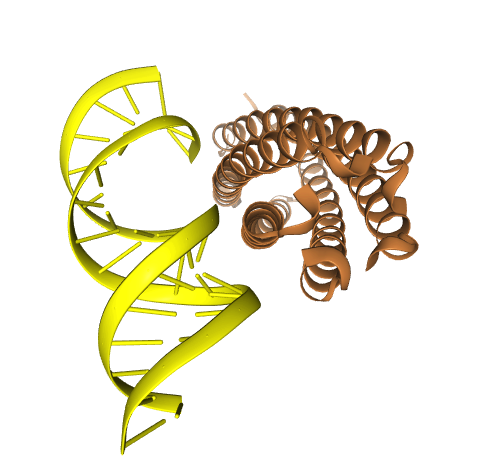



**siRNA + CSP30**
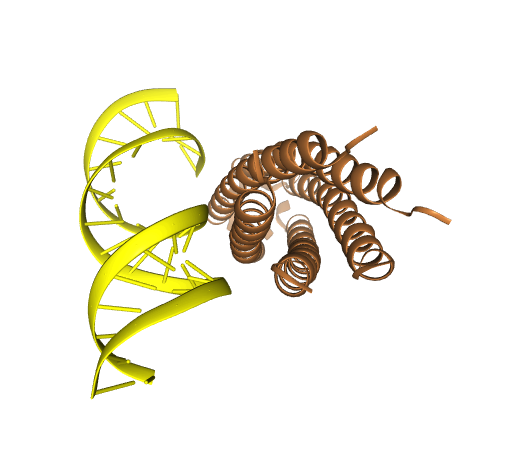



**siRNA + CSP39**
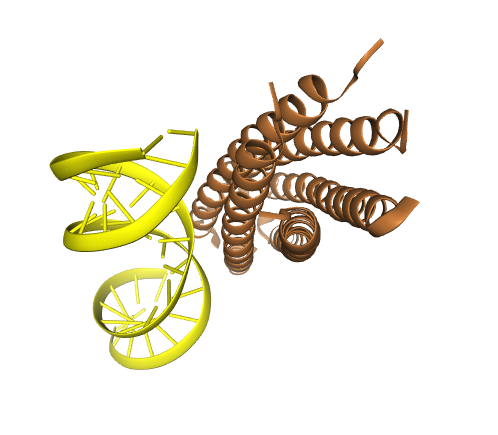



**siRNA + CSP51**
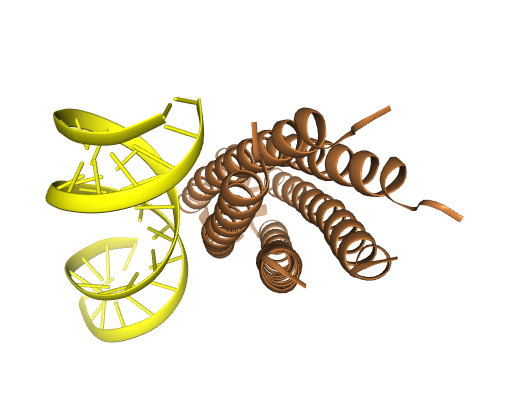



**siRNA + CSP61**
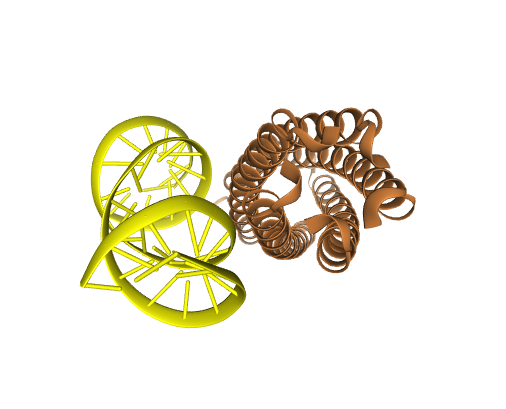



# Discussion:

With Rosetta scores in the -700 to -600 range, it is clear that the FastRelaxed versions of supercharged COMPcc are thermodynamically stable and can likely be recombinantly biosynthesized in an E. coli expression system. The RMSD alignment values in the 0.7-1.5 angstrom range also demonstrate that the CSP mutants maintain their alpha-helical secondary structure and remain well-aligned with COMPcc in spite of the proposed mutations. Finally, the low docking scores show with high confidence that the positively supercharged CSPs, compared to native COMPcc, exhibit a higher probability of binding to siRNAs. Overall, the algorithm has generated sequences with vigorous support from computational calculations, demonstrating a strong and coherent design rationale. 

With regard to future directions, there is continued interest in developing more robustly positively-supercharged variants for the Montclare Lab's work on siRNA delivery. It has been previously shown that as long as key residues in COMPcc necessary for its homopentameric formation are not changed, the protein is known to retain its pentameric secondary structure (Gunasekar et al., 2009). Using this finding, the sequences generated by the analytical algorithm examined in this project, with the key residues unchanged, could be measured for their siRNA binding and provide iterative feedback.

There is also a novel interest in negatively supercharged variants as well to serve as a different type of drug-delivering modality. Of particular interest is whether the combination of both supercharged species can generate larger supramolecular complexes. A recent paper from the Schroeder group describes the generation of large, supramolecular toroidal complexes assembled from positively and negatively supercharged variants of green fluorescent proteins (GFPs) (Jacobs et al., 2022). Given that GFP adopts a cylindrical beta-can or beta-barrel supersecondary structure that drastically differs from the alpha-helical coiled-coil of COMPcc derivatives, the resultant supramolecular morphology of opposingly supercharged CSP building blocks tethered together is anticipated to form more fibrous structures which could potentially serve as a new, more versatile drug and gene delivery modality (Yang et al., 1996).


# Sources:

DiMaio, F.;  Leaver-Fay, A.;  Bradley, P.;  Baker, D.; André, I., Modeling Symmetric 
Macromolecular Structures in Rosetta3. PLoS ONE 2011, 6 (6), e20450.

Dowdy, S. F. Overcoming cellular barriers for RNA therapeutics. Nature Biotechnol. 2017, 35, 222–229. doi: 10.1038/nbt.3802. https://www.nature.com/articles/nbt.3802

Friedrich, M. & Aigner, A. Therapeutic siRNA: State-of-the-Art and Future Perspectives. BioDrugs 2022, 36, 549–571. doi: 10.1007/s40259-022-00549-3

Gunasekar, S. K.;  Asnani, M.;  Limbad, C.;  Haghpanah, J. S.;  Hom, W.;  Barra, H.;  Nanda, S.;  
Lu, M.; Montclare, J. K., N-Terminal Aliphatic Residues Dictate the Structure, Stability, Assembly, and Small Molecule Binding of the Coiled-Coil Region of Cartilage Oligomeric Matrix Protein. Biochemistry 2009, 48 (36), 8559–8567.

Guntas, G.;  Purbeck, C.; Kuhlman, B., Engineering a protein–protein interface using a 
computationally designed library. Proc. Natl. Acad. Sci. 2010, 107 (45), 19296–19301.

Jacobs, M. I., Bansal, P., Shukla, D., & Schroeder, C. M. (2022). Understanding Supramolecular 
Assembly of Supercharged Proteins. ACS central science, 8(9), 1350–1361. https://doi.org/10.1021/acscentsci.2c00730

Koga, N.;  Tatsumi-Koga, R.;  Liu, G.;  Xiao, R.;  Acton, T. B.;  Montelione, G. T.; Baker, D., 
Principles for designing ideal protein structures. Nature 2012, 491 (7423), 222–227.

Kuhlman, B.;  Dantas, G.;  Ireton, G. C.;  Varani, G.;  Stoddard, B. L.; Baker, D., Design of a 
Novel Globular Protein Fold with Atomic-Level Accuracy. Science 2003, 302 (5649), 1364-1368.

Leaver-Fay, A.;  Tyka, M.;  Lewis, S. M.;  Lange, O. F.;  Thompson, J.;  Jacak, R.;  Kaufman, K. 
W.;  Renfrew, P. D.;  Smith, C. A.;  Sheffler, W.;  Davis, I. W.;  Cooper, S.;  Treuille, A.;  Mandell, D. J.;  Richter, F.;  Ban, Y.-E. A.;  Fleishman, S. J.;  Corn, J. E.;  Kim, D. E.;  Lyskov, S.;  Berrondo, M.;  Mentzer, S.;  Popović, Z.;  Havranek, J. J.;  Karanicolas, J.;  Das, R.;  Meiler, J.;  Kortemme, T.;  Gray, J. J.;  Kuhlman, B.;  Baker, D.; Bradley, P., Chapter nineteen - Rosetta3: An Object-Oriented Software Suite for the Simulation and Design of Macromolecules. In Methods in Enzymology, Johnson, M. L.; Brand, L., Eds. Academic Press: 2011; Vol. 487, pp 545–574.

Leman, J.K.; Weitzner, B.D.; Lewis, S. M. et al. Macromolecular modeling and design in 
Rosetta: recent methods and frameworks. Nat. Methods. 2020, 17, 665–680. doi: 10.1038/s41592-020-0848-2

Liu, C. F., Chen, R., Frezzo, J. A., Katyal, P., Hill, L. K., Yin, L., Srivastava, N., More, H. T., 
Renfrew, P. D., Bonneau, R., & Montclare, J. K. (2017). Efficient Dual siRNA and Drug Delivery Using Engineered Lipoproteoplexes. Biomacromolecules, 18(9), 2688–2698. https://doi.org/10.1021/acs.biomac.7b00203

McFarlane, A., Orriss, G., Okun, N., Meier, M., Klonisch, T., Khajehpour, M., & Stetefeld, J. (2012). The pentameric channel of COMPcc in complex with different fatty acids. PloS one, 7(11), e48130. https://doi.org/10.1371/journal.pone.0048130

McFarlane, A. A., Orriss, G. L., & Stetefeld, J. (2009). The use of coiled-coil proteins in drug 
delivery systems. European journal of pharmacology, 625(1-3), 101–107. https://doi.org/10.1016/j.ejphar.2009.05.034

More, H. T., Frezzo, J. A., Dai, J., Yamano, S., & Montclare, J. K. (2014). Gene delivery from 
supercharged coiled-coil protein and cationic lipid hybrid complex. Biomaterials, 35(25), 7188–7193. https://doi.org/10.1016/j.biomaterials.2014.05.005

Mulligan, V. (Ed.). (2017, May 29). Scoring Tutorial. Scoring tutorial. https://new.rosettacommons.org/demos/latest/tutorials/scoring/scoring

Porter, J. R.;  Weitzner, B. D.; Lange, O. F., A Framework to Simplify Combined Sampling 
Strategies in Rosetta. PLoS ONE 2015, 10 (9), e0138220.

Rosetta Commons. [Internet]. Available from: https://www.rosettacommons.org

Sung, Y. K., & Kim, S. W. (2019). Recent advances in the development of gene delivery systems. 
Biomaterials research, 23, 8. https://doi.org/10.1186/s40824-019-0156-z

Yan, Y., Zhang, D., Zhou, P., Li, B., & Huang, S. Y. (2017). HDOCK: a web server for protein-protein and protein-DNA/RNA docking based on a hybrid strategy. Nucleic acids research, 45(W1), W365–W373. https://doi.org/10.1093/nar/gkx407

Yang, F., Moss, L. & Phillips, G. The molecular structure of green fluorescent protein. Nat 
Biotechnol 1996, 14, 1246–1251.

Ye, K., Malinina, L. & Patel, D. Recognition of small interfering RNA by a viral suppressor of RNA silencing. Nature 426, 874–878 (2003). https://doi.org/10.1038/nature02213
